In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.2 MB/s eta 0:00:00
  

In [ ]:
import pandas as pd

from pycaret.classification import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')

In [ ]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/test.csv')



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [ ]:
classification_setup = setup(data=train, target='label', pca=True,  pca_components=10, session_id=1223)

,Description,Value
0,Session id,1223
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(42000, 785)"
4,Transformed data shape,"(42000, 11)"
5,Transformed train set shape,"(29399, 11)"
6,Transformed test set shape,"(12601, 11)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#classification_setup = setup(data= df, target='label',remove_outliers=True,normalize=True,normalize_method='robust',pca=True,  pca_components=10,session_id = 2345)

,Description,Value
0,Session id,2345
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(42000, 785)"
4,Transformed data shape,"(40530, 11)"
5,Transformed train set shape,"(27929, 11)"
6,Transformed test set shape,"(12601, 11)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9211,0.9867,0.9211,0.9210,0.9209,0.9123,0.9124,3.3640
xgboost,Extreme Gradient Boosting,0.9160,0.9951,0.9160,0.9163,0.9160,0.9066,0.9067,6.9820
lightgbm,Light Gradient Boosting Machine,0.9145,0.9949,0.9145,0.9149,0.9146,0.9050,0.9050,12.1800
et,Extra Trees Classifier,0.9144,0.9945,0.9144,0.9143,0.9142,0.9049,0.9049,5.8600
rf,Random Forest Classifier,0.9032,0.9933,0.9032,0.9033,0.9031,0.8924,0.8924,13.1500
qda,Quadratic Discriminant Analysis,0.8862,0.0000,0.8862,0.8870,0.8863,0.8735,0.8736,2.6120
gbc,Gradient Boosting Classifier,0.8739,0.0000,0.8739,0.8744,0.8740,0.8599,0.8599,111.8680
dt,Decision Tree Classifier,0.8045,0.8915,0.8045,0.8052,0.8046,0.7827,0.7828,3.2820
lr,Logistic Regression,0.8004,0.0000,0.8004,0.7995,0.7996,0.7781,0.7782,10.9000
nb,Naive Bayes,0.7690,0.9711,0.7690,0.7723,0.7697,0.7433,0.7435,2.6910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9173,0.9868,0.9173,0.9170,0.9169,0.9081,0.9082
1,0.9245,0.9871,0.9245,0.9243,0.9243,0.9161,0.9161
2,0.9204,0.9860,0.9204,0.9201,0.9201,0.9115,0.9116
3,0.9163,0.9876,0.9163,0.9169,0.9163,0.9070,0.9071
4,0.9269,0.9878,0.9269,0.9265,0.9265,0.9187,0.9188
5,0.9160,0.9866,0.9160,0.9161,0.9158,0.9066,0.9067
6,0.9194,0.9855,0.9194,0.9198,0.9192,0.9104,0.9105
7,0.9259,0.9873,0.9259,0.9254,0.9254,0.9176,0.9176
8,0.9269,0.9869,0.9269,0.9268,0.9267,0.9187,0.9188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

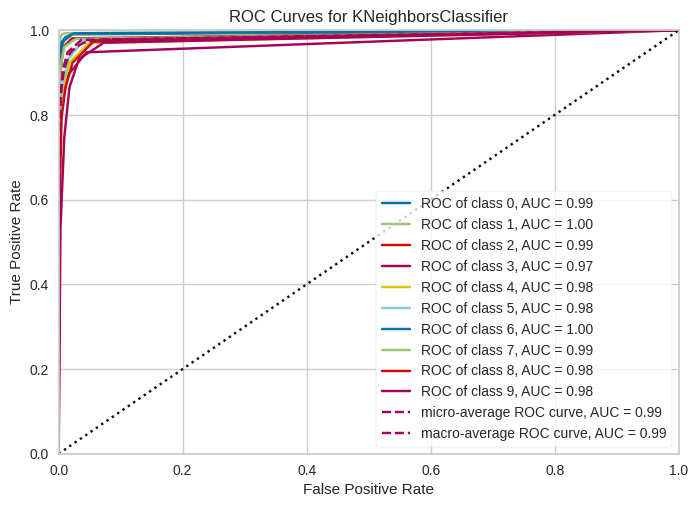

In [ ]:
plot_model(estimator = knn, plot = 'auc')

In [ ]:
xgboost = create_model('xgboost');
#blending 3 models
blend = blend_models(estimator_list=[knn,xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9112,0.9945,0.9112,0.9114,0.9112,0.9013,0.9014
1,0.9204,0.9954,0.9204,0.9210,0.9205,0.9115,0.9116
2,0.9160,0.9948,0.9160,0.9162,0.9160,0.9066,0.9066
3,0.9133,0.9951,0.9133,0.9140,0.9135,0.9036,0.9036
4,0.9153,0.9952,0.9153,0.9152,0.9152,0.9059,0.9059
5,0.9139,0.9950,0.9139,0.9141,0.9139,0.9044,0.9044
6,0.9153,0.9950,0.9153,0.9156,0.9153,0.9059,0.9059
7,0.9211,0.9960,0.9211,0.9209,0.9209,0.9123,0.9123
8,0.9214,0.9955,0.9214,0.9219,0.9216,0.9127,0.9127


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9211,0.9957,0.9211,0.9215,0.9210,0.9123,0.9123
1,0.9252,0.9962,0.9252,0.9256,0.9252,0.9168,0.9169
2,0.9293,0.9961,0.9293,0.9292,0.9291,0.9214,0.9214
3,0.9265,0.9962,0.9265,0.9272,0.9267,0.9183,0.9184
4,0.9333,0.9961,0.9333,0.9334,0.9332,0.9259,0.9259
5,0.9218,0.9962,0.9218,0.9222,0.9217,0.9131,0.9131
6,0.9255,0.9959,0.9255,0.9258,0.9254,0.9172,0.9173
7,0.9323,0.9968,0.9323,0.9320,0.9320,0.9248,0.9248
8,0.9316,0.9963,0.9316,0.9318,0.9317,0.9240,0.9240


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

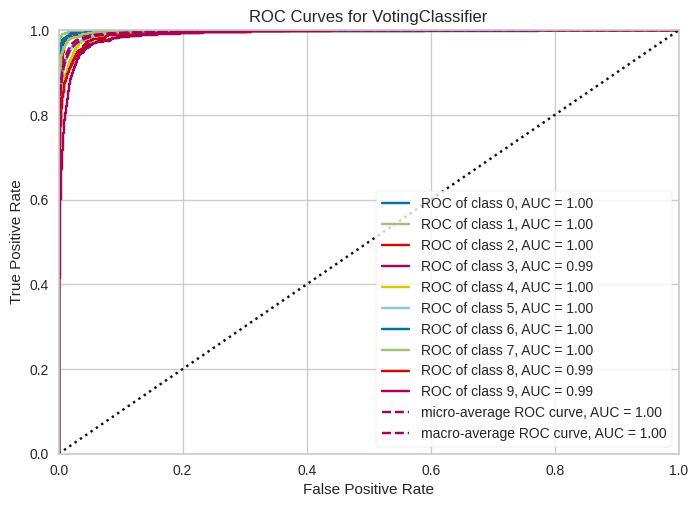

In [ ]:
plot_model(estimator = blend, plot = 'auc')

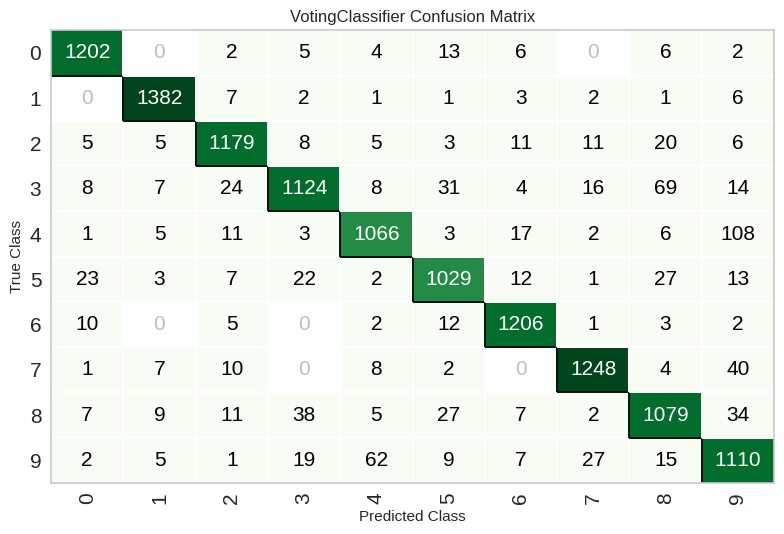

In [ ]:
plot_model(estimator = blend, plot = 'confusion_matrix')